In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diets.csv
/kaggle/input/medications.csv
/kaggle/input/Symptom-severity.csv
/kaggle/input/workout_df.csv
/kaggle/input/precautions_df.csv
/kaggle/input/Training.csv
/kaggle/input/description.csv
/kaggle/input/symtoms_df.csv


In [4]:
import  pandas as pd
from sklearn.metrics import confusion_matrix


******Checking the report of Data******

Using the ydataprofilling Technique it gives the report of data in HTML format to check whether the data having missing values, Imbalacing of data or some corellation of data...


In [5]:
dataset = pd.read_csv('/kaggle/input/Training.csv')
!pip install numba==0.56.4
!pip install -U ydata-profiling visions numba
!pip uninstall ydata-profiling visions numba -y
!pip install ydata-profiling
!pip show ydata-profiling visions numba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 46.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 44.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albu

This code Snippet gives the report

In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dataset , title="Profiling Report")
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[duplicated_rows]
/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[duplicated_rows]
/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Labeling of Target and Splitting of data

In [8]:

X=dataset.drop(labels=['prognosis'], axis=1)
y=dataset['prognosis']
# separate dataset into train and test
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(labels=['prognosis'], axis=1),
    dataset['prognosis'],
    test_size=0.3,
    random_state=0)

In [18]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
3972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Plotting the data which have highly correlated features**

<Axes: >

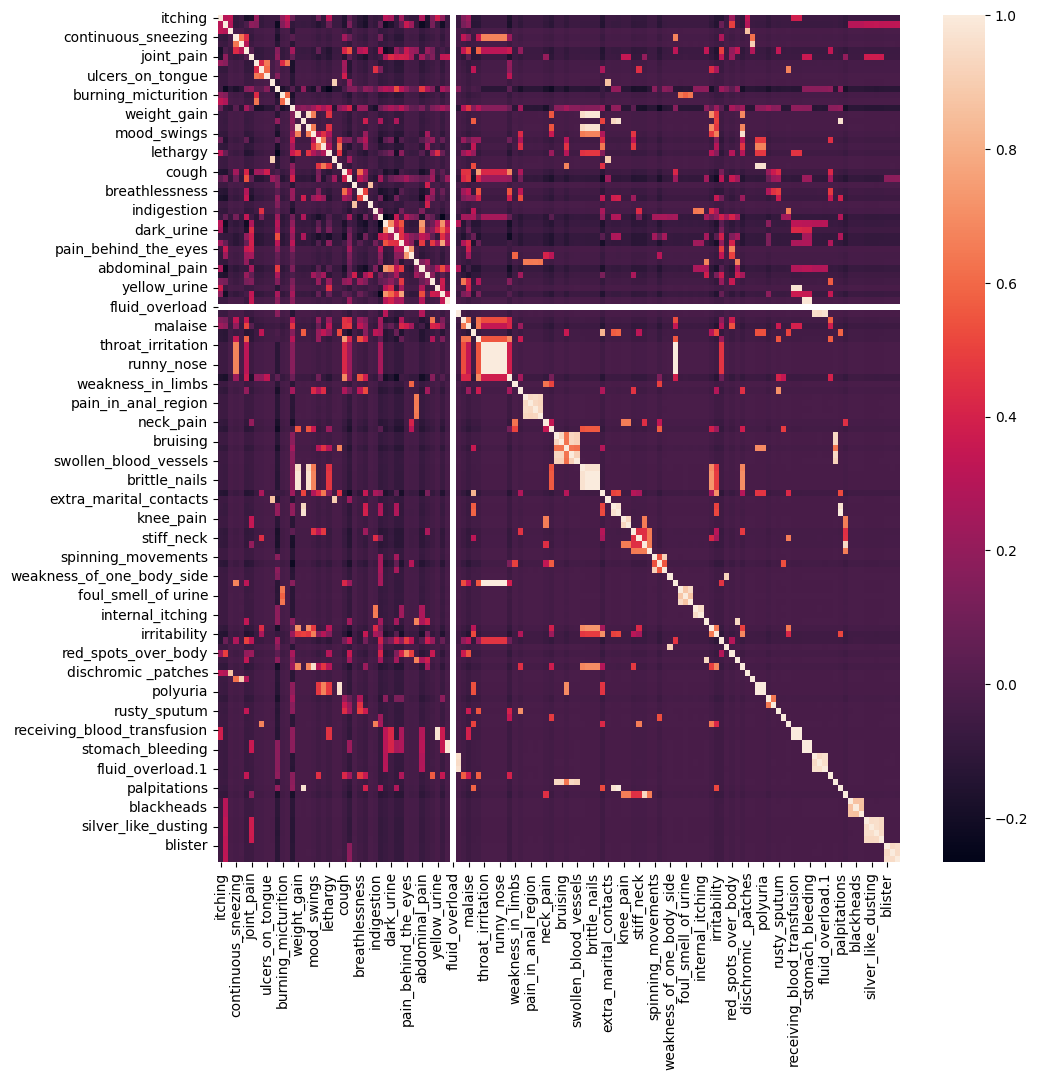

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

**Using Feature Selection Technique**

In [10]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.36057047, 0.37710391, 0.09737615, 0.15400473, 0.09568921,
       0.41444378, 0.35715996, 0.16682951, 0.14752977, 0.08044442,
       0.1282756 , 0.59270053, 0.1610965 , 0.07351115, 0.59226321,
       0.10655938, 0.11421531, 0.11752986, 0.19477304, 0.31088632,
       0.18001841, 0.32948622, 0.12725259, 0.11082466, 0.33142263,
       0.54388308, 0.10089863, 0.31045692, 0.3889395 , 0.10434689,
       0.16862581, 0.50471048, 0.41665026, 0.32782362, 0.49453173,
       0.51341857, 0.10413097, 0.18885763, 0.18940385, 0.46886692,
       0.31555796, 0.24115035, 0.10361914, 0.41701618, 0.10921277,
       0.        , 0.09500418, 0.24067776, 0.39928964, 0.25458912,
       0.25668308, 0.08735345, 0.13778762, 0.14081781, 0.11728027,
       0.11381013, 0.38388522, 0.07817584, 0.20035454, 0.09095127,
       0.09679347, 0.11189255, 0.11890713, 0.17469848, 0.2491631 ,
       0.09621813, 0.09620433, 0.16735638, 0.08886351, 0.1152266 ,
       0.12111762, 0.12731686, 0.12797133, 0.11301729, 0.31477

In [11]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

vomiting               0.592701
fatigue                0.592263
high_fever             0.543883
loss_of_appetite       0.513419
headache               0.504710
                         ...   
toxic_look_(typhos)    0.078747
weakness_in_limbs      0.078176
foul_smell_of urine    0.073984
spotting_ urination    0.073511
fluid_overload         0.000000
Length: 132, dtype: float64

<Axes: >

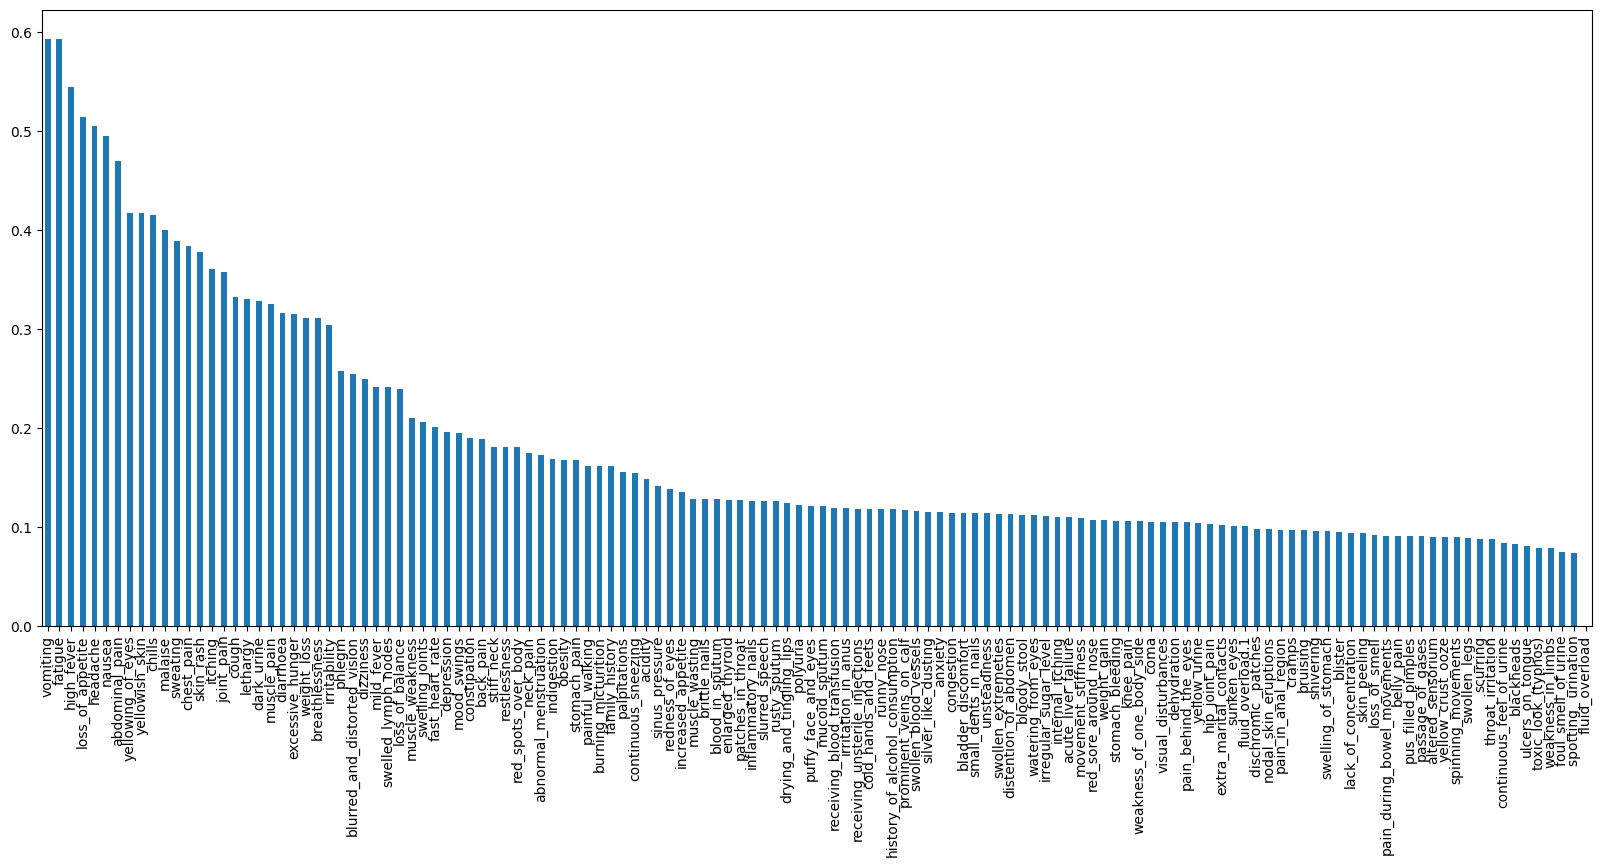

In [12]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [13]:
import pandas as pd
from sklearn.feature_selection import SelectKBest

# Fit SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=30)
sel_five_cols.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': sel_five_cols.scores_
})

# Sort by score to see the importance
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display the top 30 features
print(feature_scores.head(30))


                         Feature     Score
11                      vomiting  0.587985
14                       fatigue  0.556133
34                        nausea  0.512749
25                    high_fever  0.511339
35              loss_of_appetite  0.502946
31                      headache  0.493634
39                abdominal_pain  0.467452
32                yellowish_skin  0.431125
43             yellowing_of_eyes  0.426171
5                         chills  0.418076
48                       malaise  0.404656
56                    chest_pain  0.391659
1                      skin_rash  0.389834
28                      sweating  0.367724
6                     joint_pain  0.366432
0                        itching  0.362617
33                    dark_urine  0.347205
24                         cough  0.325235
40                     diarrhoea  0.319448
96                  irritability  0.317053
97                   muscle_pain  0.309537
21                      lethargy  0.301102
19         

In [14]:
selected_features = X_train.columns[sel_five_cols.get_support()]
print(f"Top {len(selected_features)} Selected Features:")
print(selected_features.tolist())
assert len(selected_features) == 30, "The number of selected features is not 25!"


Top 30 Selected Features:
['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue', 'weight_loss', 'lethargy', 'cough', 'high_fever', 'breathlessness', 'sweating', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'chest_pain', 'dizziness', 'excessive_hunger', 'irritability', 'muscle_pain']


In [35]:
# Select the top 30 features from training and test sets
X_train_selected = X_train.loc[:, sel_five_cols.get_support()]
X_test_selected = X_test.loc[:, sel_five_cols.get_support()]
X_train_selected = X_train_selected.astype(float)
X_test_selected = X_test_selected.astype(float)
print(X_train_selected.dtypes)
print(X_test_selected.dtypes)




itching                         float64
skin_rash                       float64
chills                          float64
joint_pain                      float64
vomiting                        float64
fatigue                         float64
weight_loss                     float64
lethargy                        float64
cough                           float64
high_fever                      float64
breathlessness                  float64
sweating                        float64
headache                        float64
yellowish_skin                  float64
dark_urine                      float64
nausea                          float64
loss_of_appetite                float64
abdominal_pain                  float64
diarrhoea                       float64
mild_fever                      float64
yellowing_of_eyes               float64
swelled_lymph_nodes             float64
malaise                         float64
blurred_and_distorted_vision    float64
phlegm                          float64


In [16]:
import numpy as np

def to_float_numpy(array):
    if isinstance(array, np.ndarray):
        return array.astype(float)
    else:  # pandas DataFrame
        return array.to_numpy(dtype=float)

X_train_selected = to_float_numpy(X_train_selected)
X_test_selected = to_float_numpy(X_test_selected)

# No need to call to_numpy() or values again
print(type(X_train_selected))  # <class 'numpy.ndarray'>
print(X_train_selected.dtype)  # float64 (or float32)


<class 'numpy.ndarray'>
float64


In [36]:
from ydata_profiling import ProfileReport
profile = ProfileReport(X_train_selected , title="Profiling Report")
profile.to_file("Selected_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train)

    # Test the model
    predictions = model.predict(X_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 0.9058265582655827
SVC Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  1,  0,  0],
 [ 0,  0, 37, ...,  1,  0,  0],
 ...,
 [ 0,  0,  0, ..., 36,  0,  0],
 [ 0,  0,  0, ...,  3, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]


RandomForest Accuracy: 0.9058265582655827
RandomForest Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]




Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f82ab177010>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


GradientBoosting Accuracy: 0.9058265582655827
GradientBoosting Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]


KNeighbors Accuracy: 0.9065040650406504
KNeighbors Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]


MultinomialNB Accuracy: 0.8760162601626016
MultinomialNB Confusion Matrix:
[[32,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 37, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0, 35,  0],
 [ 0,  0,  0, ...,  0,  0, 38]]




In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test,ypred)

In [19]:
train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy
if train_accuracy - test_accuracy > 0.1:  # 10% gap threshold
    print("The model is likely overfitting.")
else:
    print("The model generalizes well.")

The model generalizes well.


In [20]:
confusion_matrix(y_train,train_pred)

array([[88,  0,  0, ...,  0,  0,  0],
       [ 0, 89,  0, ...,  0,  0,  0],
       [ 0,  0, 82, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  0, 82,  0],
       [ 0,  0,  0, ...,  0,  0, 82]])

In [23]:
import pickle

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("RandomForest model saved as 'rf_model.pkl'")


RandomForest model saved as 'rf_model.pkl'


In [24]:
 # load model
rf = pickle.load(open('rf.pkl','rb'))

In [25]:
y_test = y_test.reset_index(drop=True)
print("Actual Disease :", y_test[0])


Actual Disease : Heart attack


In [26]:
# test 1:
print("predicted disease :",rf.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : ['Heart attack']
Actual Disease : Heart attack


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
# test 2:
print("predicted disease :",rf.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : ['Typhoid']
Actual Disease : Typhoid


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
sym_des = pd.read_csv('/kaggle/input/symtoms_df.csv')
precautions = pd.read_csv('/kaggle/input/precautions_df.csv')
workout = pd.read_csv('/kaggle/input/workout_df.csv')
description = pd.read_csv('/kaggle/input/description.csv')
medications = pd.read_csv('/kaggle/input/medications.csv')
diets = pd.read_csv('/kaggle/input/diets.csv')


In [31]:
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [33]:
import numpy as np
import pandas as pd

# Assuming symptoms_dict and diseases_list are defined like this:
# symptoms_dict = {'itching': 0, 'skin_rash': 1, 'dark_urine': 2, ...}
# diseases_list = ['Disease1', 'Disease2', 'Disease3', ...]

# Replace this with your actual trained classifier
# svc = RandomForestClassifier() or your trained model

# Function to get the predicted value
def get_predicted_value(patient_symptoms):
    input_vector = [0] * len(symptoms_dict)
    
    for item in patient_symptoms:
        if item in symptoms_dict:
            input_vector[symptoms_dict[item]] = 1
        else:
            print(f"Warning: Symptom '{item}' not recognized!")
    
    input_vector = np.array(input_vector).reshape(1, -1)
    
    predicted_index = rf.predict(input_vector)[0]
    
    if isinstance(predicted_index, int):
        return diseases_list[predicted_index]
    else:
        return predicted_index

# User input
symptoms = input("Enter your symptoms (comma-separated): ")
user_symptoms = [s.strip() for s in symptoms.split(',')]

# Predict the disease
predicted_disease = get_predicted_value(user_symptoms)

# Fetch additional details using the helper function
desc, pre, med, die, wrkout = helper(predicted_disease)

# Display Results
print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)

print("=================precautions==================")
for i, p in enumerate(pre[0], start=1):
    print(f"{i}: {p}")

print("=================medications==================")
for i, m in enumerate(med, start=1):
    print(f"{i}: {m}")

print("=================workout==================")
for i, w in enumerate(wrkout, start=1):
    print(f"{i}: {w}")

print("=================diets==================")
for i, d in enumerate(die, start=1):
    print(f"{i}: {d}")


Enter your symptoms (comma-separated):  itching,skin_rash,loss_of_appetite


=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1: bath twice
2: use detol or neem in bathing water
3: keep infected area dry
4: use clean cloths
=================medications==================
1: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
1: Avoid sugary foods
2: Consume probiotics
3: Increase intake of garlic
4: Include yogurt in diet
5: Limit processed foods
6: Stay hydrated
7: Consume green tea
8: Eat foods rich in zinc
9: Include turmeric in diet
10: Eat fruits and vegetables
=================diets==================
1: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
print(selected_features.tolist())

['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue', 'weight_loss', 'lethargy', 'cough', 'high_fever', 'breathlessness', 'sweating', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'chest_pain', 'excessive_hunger', 'loss_of_balance', 'irritability', 'muscle_pain']
